Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Kanawut Kaewnoparat"
ID = "st122109"

---

# Lab 08: Deep Learning Part I: Fully Connected Neural Networks

In class, we have developed the mathematics and programming techniques for binary classification using fully connected neural networks having one or more hidden layers.

Today, we'll see how to implement backpropagation in
hand-coded neural networks and also expand on that to consider
(small) image classification using again fully connected neural networks but now with a multinomial
(softmax) output layer.

In [2]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension


## What is Deep learning doing?

Let's try to understand what's happening in a deep learning model
using the [TensorFlow playground](https://playground.tensorflow.org/).
The playground is a Web application that lets you visualize a network
as it's being optimized.

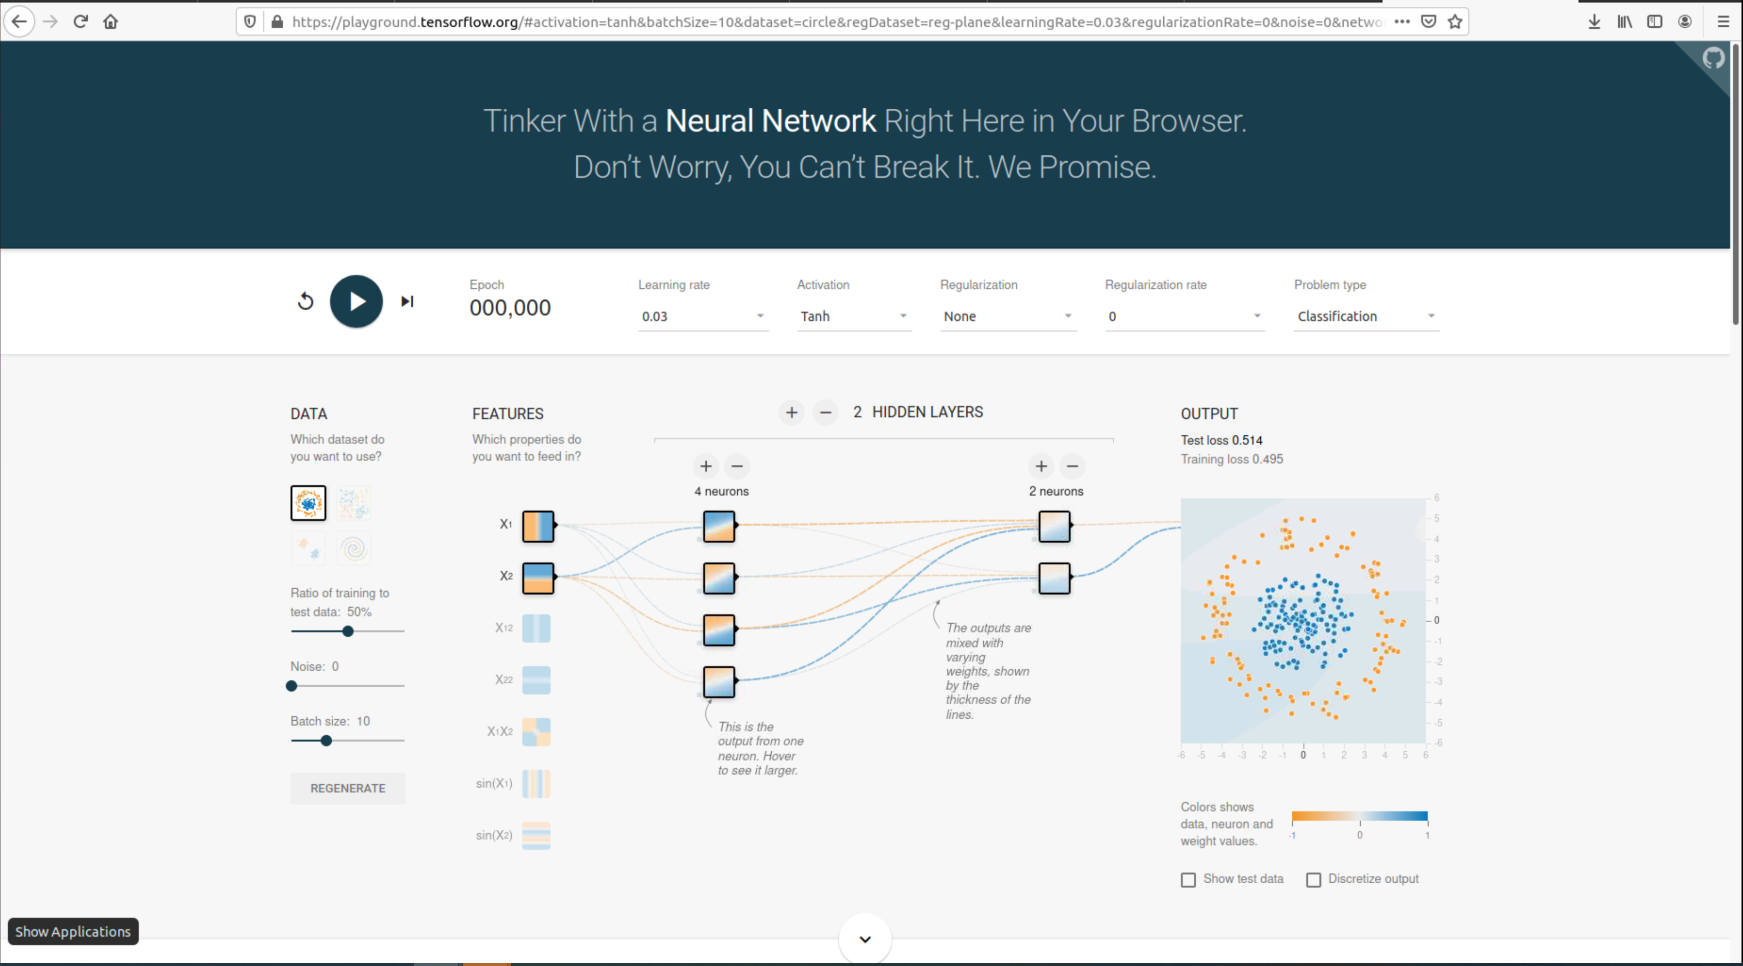

Set up a model with parameters (at the left) as:
- Ratio of training to test data: 90%
- Noise: 5
- Batch size: 4

Press "run" and observe the result. You can play around with the model.


## Exercise 1 (10 points)

In the Playground, select the spiral shape for the data
(the 4th shape). Set up parameters as follows.
- Ratio of training to test data: 90%
- Noise: 35
- Batch size: 4

Try to find a structure and parameters to find the best separation
between positive and negative cases. Capture a full screen result and input it in the next cell.

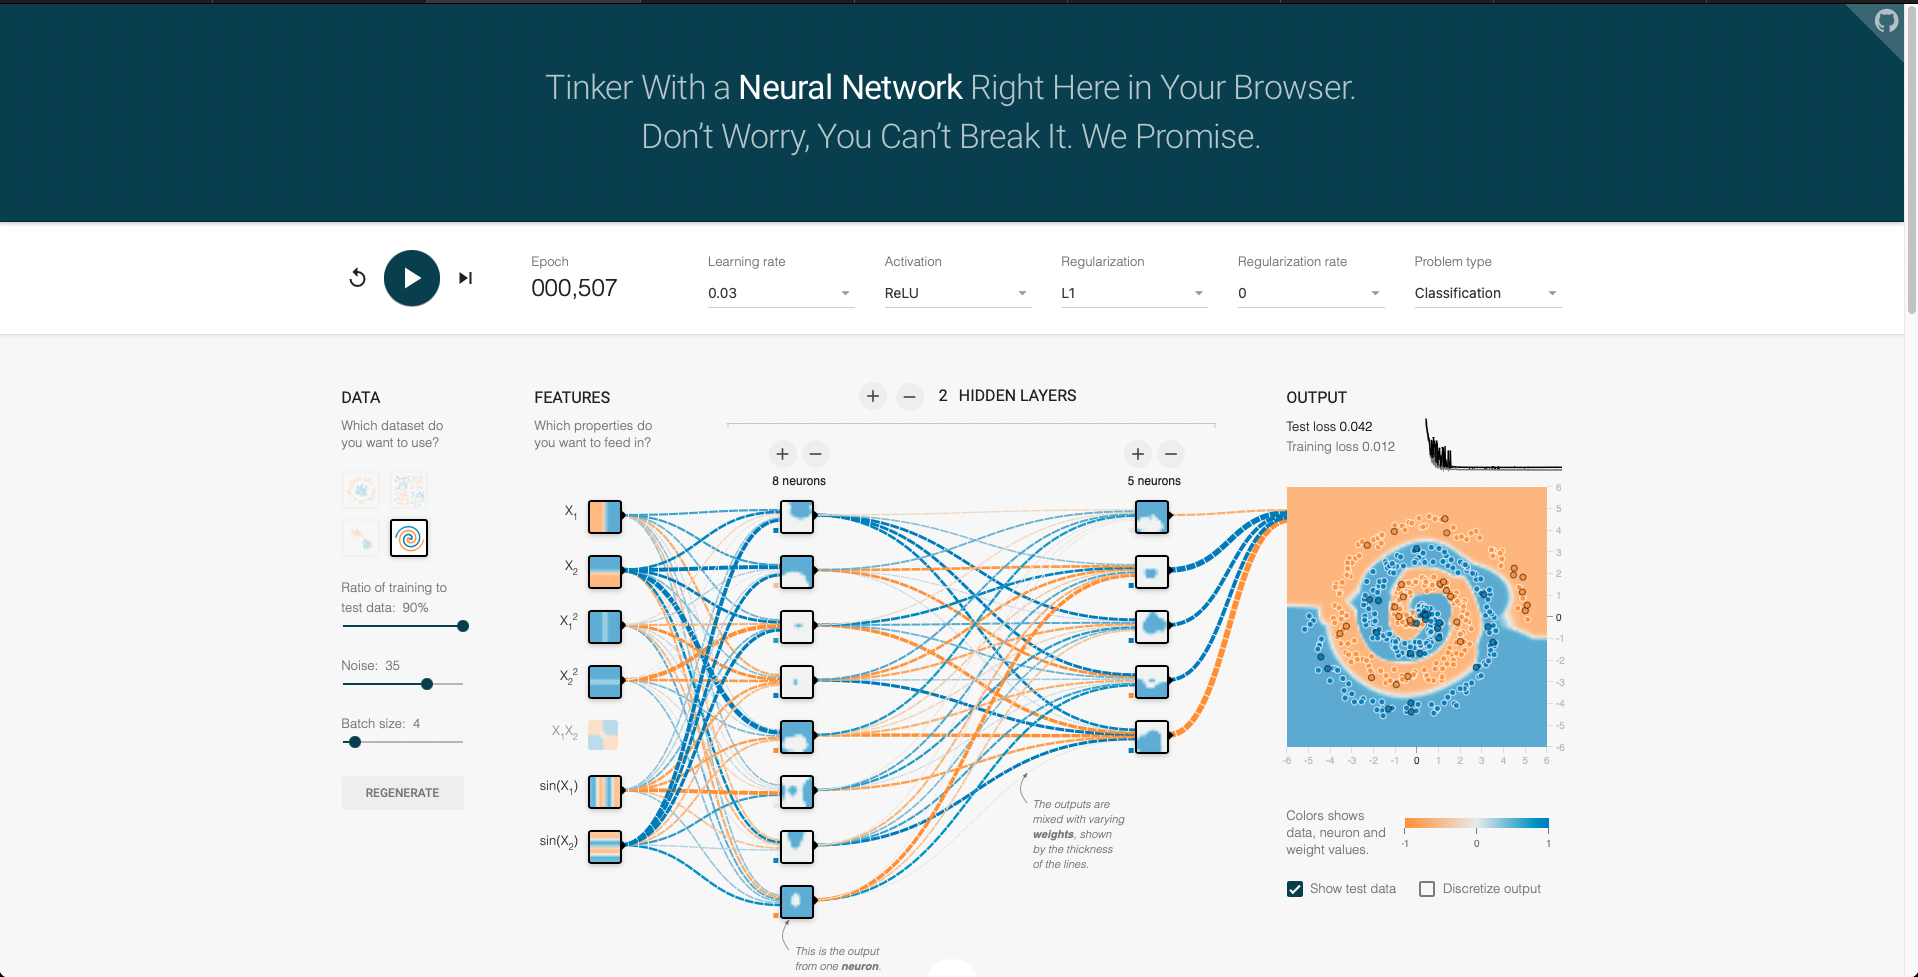

**Expected result**:

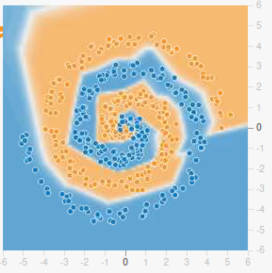

Let's make a GUI in Jupyter next (you GUI can also export to a HTML website).
Fix the settings to reflect what you did on the Playground.

In [3]:
# # YOUR CODE HERE
# raise NotImplementedError()
from IPython.display import display, Markdown, clear_output

# Use the widget package
import ipywidgets as widgets

# Define some widgets
lblQ1 = widgets.Label(
        value="Q1) What is your learning rate?")
rdoQ1 = widgets.RadioButtons(
        options=['0.00001', '0.0001', '0.001', '0.003', '0.01', '0.03', '0.1', '0.3', '1', '3', '10',],
        value='0.03',
        description='\t',
        disabled=False)

lblQ2 = widgets.Label(
        value="Q2) What is your activation function in last layer?")
rdoQ2 = widgets.RadioButtons(
        options=['ReLu', 'Tanh', 'Sigmoid', 'Linear',],
        value='Tanh',
        description='\t',
        disabled=False)

lblQ3 = widgets.Label(
        value="Q3) What is problem type?")
rdoQ3 = widgets.RadioButtons(
        options=['Classification', 'Regression'],
        value='Classification',
        description='\t',
        disabled=False)

lblQ4 = widgets.Label(value="Q4) Which input do you use?")
chkQ4_1 = widgets.Checkbox(
           description='$X_1$',
           value=True)
chkQ4_2 = widgets.Checkbox(
           description='$X_2$',
           value=True)
chkQ4_3 = widgets.Checkbox(
           description='$X_1^2$',
            value=True)
chkQ4_4 = widgets.Checkbox(
           description='$X_1X_2$',)
chkQ4_5 = widgets.Checkbox(
           description='$X_2^2$',
            value = True)
chkQ4_6 = widgets.Checkbox(
           description='sin$(X_1)$',
            value=True)
chkQ4_7 = widgets.Checkbox(
           description='sin$(X_2)$',
            value =True)
chkQ4 = widgets.VBox([chkQ4_1, chkQ4_2, chkQ4_3, chkQ4_4, chkQ4_5, chkQ4_6, chkQ4_7])

lblQ5 = widgets.Label(value="Q5) How many hidden layers do you use?")
txtQ5 = widgets.IntText(
       value=2,
       description='hidden layers', )

lblQ6 = widgets.Label(value="Q6) Explain your nodes for each layer")
txtQ6 = widgets.Textarea(
       value='There are 8 nodes or neurons on the first layer and another 5 on the second layer',
       description= 'explanation', )

box = widgets.VBox([lblQ1, rdoQ1, lblQ2, rdoQ2, lblQ3, rdoQ3, lblQ4, chkQ4, lblQ5, txtQ5, lblQ6, txtQ6,])

box

In [4]:
q4str = ""
if chkQ4_1.value:
    q4str += " X1,"
if chkQ4_2.value:
    q4str += " X2,"
if chkQ4_3.value:
    q4str += " X1^2,"
if chkQ4_4.value:
    q4str += " X1X2,"
if chkQ4_5.value:
    q4str += " X2^2,"
if chkQ4_6.value:
    q4str += " sin(X1),"
if chkQ4_7.value:
    q4str += " sin(X2),"
print("Use input features:", q4str)
print("Problem type:", rdoQ3.value)
print("The last activation function:", rdoQ2.value)
print("Learning rate:", rdoQ1.value)
print("Use", txtQ5.value, "hidden layers. Each layer contains", txtQ6.value)

Use input features:  X1, X2, X1^2, X2^2, sin(X1), sin(X2),
Problem type: Classification
The last activation function: Tanh
Learning rate: 0.03
Use 2 hidden layers. Each layer contains There are 8 nodes or neurons on the first layer and another 5 on the second layer


## MNIST data set

An image is a 2D array of pixels. Pixels can be scalar intensities (for a grayscale / black and white image) or
a vector indicating a point in a color space such as RGB or HSV.

Today we'll consider 8$\times$8 grayscale images of digits from the famous "MNIST" dataset, which was considered
a benchmark for machine learning algorithms up to the early 2000s, before the advent of large-scale image
classification datasets.

MNIST is part of the SciKit-Learn module and has 10 classes,
with 180 samples per class in most cases, for a total of 1797 samples.

Let's load the dataset and plot an example.

Text(0.5, 1.0, 'Example MNIST sample (category 0)')

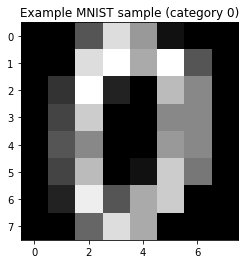

In [5]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load data

data = load_digits()

def convert_to_one_hot(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, int(y[i])] = 1
    return y_vect

# Convert target indices to one-hot representation

y_indices = data.target
y = convert_to_one_hot(y_indices)
X = np.matrix(data.data)
M = X.shape[0]
N = X.shape[1]

# Plot an example

plt.imshow(np.reshape(X[0,:],(8,8)), 'gray')
plt.title('Example MNIST sample (category %d)' % y_indices[0])

In [6]:
#use dir to see the attribute of objects
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

## Hand-Coded Fully Connected Neural Network

OK, now let's develop some code based on the mathematics we developed in
class to work with this dataset and run 100 epochs of training.
The main change is to use a one-hot encoding of the 10 classes at the output layer and to use
the softmax activation function at the output. Some minor changes are required to calculate multinomial
cross entropy loss rather than binary cross entropy loss.

First, some imports.

In [7]:
import random
import warnings
warnings.filterwarnings("ignore")

Next, let's normalize the input features using z-scaling (subtracting the mean of each input then dividing by
its standard deviation).

In [8]:
def normalize(X):
    M = X.shape[0]
    XX = X - np.tile(np.mean(X,0),[M,1])
    XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
    return np.nan_to_num(XX, copy=True,nan=0.0)

XX = normalize(X)

Note that some researchers that do deep learning with
images use the word "normalization" to specifically indicate dividing
pixel intensities by 255 in order to scale them to the range 0..1. We use the more general
sense of the word "normalize," and we use the specific normalization technique of z-scaling.

Next we'll partition the data into separate training and test datasets.

In [9]:
idx = np.arange(0,M)

random.shuffle(idx)
percent_train = .6
m_train = int(M * percent_train)
train_idx = idx[:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];
y_test_indices = y_indices[test_idx]

In [10]:
print(X_train.shape)

(1078, 64)


Next, let's define a 3-layer network with sigmoid activation functions,
6 units in layer 1, and 5 units in layer 2.

In [11]:
N

64

In [12]:
h2 = 5
h1 = 6
W = [[], np.random.normal(0, 0.1, [N, h1]),
         np.random.normal(0, 0.1, [h1, h2]),
         np.random.normal(0, 0.1, [h2, 10])]
b = [[], np.random.normal(0, 0.1, [h1, 1]),
         np.random.normal(0, 0.1, [h2, 1]),
         np.random.normal(0, 0.1, [10, 1])]
L = len(W) - 1

Next, let's create some important functions used later.

In [13]:
def sigmoid_act(z):
    return 1 / (1 + np.exp(-z))

def softmax_act(z):
    exps = np.exp(z)
    return exps / np.sum(exps)

def sigmoid_actder(z):
    az = sigmoid_act(z)
    prod = np.multiply(az, 1 - az)
    return prod

def ff(x, W, b):
    L = len(W)-1
    a = x
    for l in range(1, L + 1):
        z = W[l].T * a + b[l]
        if (l == L):
            a = softmax_act(z)
        else:
            a = sigmoid_act(z)
    return a

def loss(y, yhat):
    return - np.dot(y, np.log(yhat))

def forward(x_this, W, b):
    L = len(W) - 1
    a = [x_this]
    z = [[]]
    delta = [[]]
    dW = [[]]
    db = [[]]
    for l in range(1, L + 1):
        z.append(W[l].T * a[l-1] + b[l])
        if (l == L):
            a.append(softmax_act(z[l]))
        else:
            a.append(sigmoid_act(z[l]))
        # Just to give arrays the right shape for the backprop step
        delta.append([]); dW.append([]); db.append([])
    return a, z, delta, dW, db

def back_propagation(y_this, a, z, W, dW, db, show_check=False):
    '''
    Backprop step. Note that derivative of multinomial cross entropy
    loss is the same as that of binary cross entropy loss. See
    https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba
    for a nice derivation.
    '''
    L = len(W) - 1
    delta[L] = a[L] - np.matrix(y_this).T
    for l in range(L, 0, -1):
        db[l] = delta[l].copy()
        dW[l] = a[l-1] * delta[l].T
        if l > 1:
            delta[l-1] = np.multiply(sigmoid_actder(z[l-1]), W[l] * delta[l])

    # Check delta calculation

    if show_check:
        print('Target: %f' % y_this)
        print('y_hat: %f' % a[L][0, 0])
        print(db)
        y_pred = ff(x_this,W,b)
        diff = 1e-3
        W[1][10, 0] = W[1][10, 0] + diff
        y_pred_db = ff(x_this,W,b)
        L1 = loss(y_this, y_pred)
        L2 = loss(y_this, y_pred_db)
        db_finite_difference = (L2 - L1) / diff
        print('Original out %f, perturbed out %f' %
             (y_pred[0, 0], y_pred_db[0, 0]))
        print('Theoretical dW %f, calculated db %f' %
              (dW[1][10, 0], db_finite_difference[0, 0]))
    return dW, db

def update_step(W, b, dW, db, alpha):
    L = len(W) - 1
    for l in range(1, L + 1):            
        W[l] = W[l] - alpha * dW[l]
        b[l] = b[l] - alpha * db[l]
    return W, b

Now, let's train for 100 epochs with a mini-batch size of 1.

In [14]:
cost_arr = [] 

alpha = 0.01
max_iter = 100
for iter in range(0, max_iter):
    loss_this_iter = 0
    order = np.random.permutation(m_train)
    for i in range(0, m_train):
        
        # Grab the pattern order[i]
        
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]

        # Feed forward step
        a, z, delta, dW, db = forward(x_this, W, b)
            
        # calulate loss
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
        
        # back propagation
        dW, db = back_propagation(y_this, a, z, W, dW, db, show_check=False)
        
        # update weight, bias
        W, b = update_step(W, b, dW, db, alpha)
            
    cost_arr.append(loss_this_iter[0,0])
    if (iter +1) % 5 == 0:
        print('Epoch %d train loss %f' % (iter+1, loss_this_iter))

Epoch 5 train loss 2484.361101
Epoch 10 train loss 2413.736351
Epoch 15 train loss 2007.074877
Epoch 20 train loss 1848.217238
Epoch 25 train loss 1735.462296
Epoch 30 train loss 1496.256860
Epoch 35 train loss 1133.072981
Epoch 40 train loss 835.077701
Epoch 45 train loss 648.766568
Epoch 50 train loss 523.071082
Epoch 55 train loss 432.545472
Epoch 60 train loss 364.482506
Epoch 65 train loss 309.688706
Epoch 70 train loss 266.154158
Epoch 75 train loss 232.155496
Epoch 80 train loss 206.088437
Epoch 85 train loss 183.003705
Epoch 90 train loss 166.933023
Epoch 95 train loss 148.213292
Epoch 100 train loss 138.009210


Let's plot the loss over time per epoch.

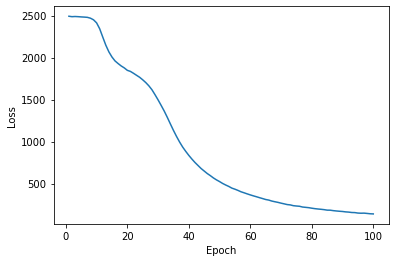

In [15]:
plt.plot(np.arange(1, max_iter + 1, 1), cost_arr)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Let's get the test set accuracy.

In [16]:
def predict_y(W, b, X):
    M = X.shape[0]
    y_pred = np.zeros(M)
    for i in range(X.shape[0]):
        y_pred[i] = np.argmax(ff(X[i, :].T, W, b))
    return y_pred

y_test_predicted = predict_y(W, b, X_test)
y_correct = y_test_predicted == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: %.4f' % (test_accuracy))

Test accuracy: 0.8748


## In-class exercise (40 points)

Modify the code above to plot both training loss and test loss as a function of epoch number.
Use early stopping to obtain the best model according to the validation set.
Experiment with the hyperparameters (learning rate, number of layers, number of units per layer) to get
the best result you can. In the cell below,
- Train with at least three different hyperparameter sets.
- Plot loss curves for the training and test sets on the same graph, with a legend showing the different
  hyperparameter settings.
- For each set of parameters, give the best validation accuracy.
- Describe your experiments and results below the code.

In [17]:
import random
import warnings
import copy
warnings.filterwarnings("ignore")

### model1: 2 layers with 6,5 nodes, and learning rate of 0.01, with 100 epochs

epoch 10 train loss 2408.091706 validate loss 1583.660141
epoch 20 train loss 1475.873902 validate loss 1005.422589
epoch 30 train loss 1031.232293 validate loss 760.845729
epoch 40 train loss 809.409917 validate loss 633.694679
epoch 50 train loss 756.005977 validate loss 606.907455
epoch 60 train loss 743.126692 validate loss 600.801726
epoch 70 train loss 739.938041 validate loss 599.255629
epoch 80 train loss 739.142872 validate loss 598.870077
epoch 90 train loss 738.944193 validate loss 598.773731
epoch 100 train loss 738.894528 validate loss 598.749659


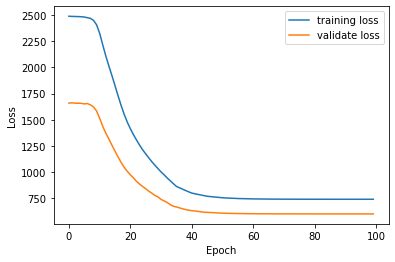

Test accuracy: 0.7649513212795549 for alpha =0.01


In [18]:
copy_w = None
copy_b = None
loss_tol = 10
wait_iteration = 5
best_val_loss = 0
best_val_loss_idx = 0
tolerance = 30
# Train for 100 epochs with mini-batch size 1

cost_arr = [] 
val_loss_arr = []
M, N = X_train.shape

alpha=0.01


h2 = 5
h1 = 6
W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,10])]
b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[10,1])]
L = len(W)-1


max_iter = 100
for iter in range(1, max_iter+1):
    loss_this_iter = 0
    order = np.random.permutation(M)
    for i in range(0,M):
        
        # Grab the pattern order[i]
        
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]

        # Feed forward step
        
        a = [x_this]
        z = [[]]
        delta = [[]]
        dW = [[]]
        db = [[]]
        for l in range(1,L+1):
            z.append(W[l].T*a[l-1]+b[l])
            if (l == L):
                a.append(softmax_act(z[l]))
            else:
                a.append(sigmoid_act(z[l]))
            # Just to give arrays the right shape for the backprop step
            delta.append([]); dW.append([]); db.append([])
            
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
            
        # Backprop step. Note that derivative of multinomial cross entropy
        # loss is the same as that of binary cross entropy loss. See
        # https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba
        # for a nice derivation.

        delta[L] = a[L] - np.matrix(y_this).T
        for l in range(L,0,-1):
            db[l] = delta[l].copy()
            dW[l] = a[l-1] * delta[l].T
            if l > 1:
                delta[l-1] = np.multiply(sigmoid_actder(z[l-1]), W[l] *
                             delta[l])
                
        # Check delta calculation
        
        if False:
            print('Target: %f' % y_this)
            print('y_hat: %f' % a[L][0,0])
            print(db)
            y_pred = ff(x_this,W,b)
            diff = 1e-3
            W[1][10,0] = W[1][10,0] + diff
            y_pred_db = ff(x_this,W,b)
            L1 = loss(y_this,y_pred)
            L2 = loss(y_this,y_pred_db)
            db_finite_difference = (L2-L1)/diff
            print('Original out %f, perturbed out %f' %
                 (y_pred[0,0], y_pred_db[0,0]))
            print('Theoretical dW %f, calculated db %f' %
                  (dW[1][10,0], db_finite_difference[0,0]))
        
        for l in range(1,L+1):            
            W[l] = W[l] - alpha * dW[l]
            b[l] = b[l] - alpha * db[l]
            
    val_loss = 0
    for i in range(X_test.shape[0]):
        y_val = ff(X_test[i, :].T, W, b)
        y_val = np.array(y_val).flatten()
        val_loss += loss(y_test[i, :], y_val)
        
    if iter% 10 ==0:
        print('epoch %d train loss %f validate loss %f' % (iter, loss_this_iter, val_loss))

    if val_loss < best_val_loss or best_val_loss == 0 :
        copy_w, copy_b = copy.deepcopy(W), copy.deepcopy(b)
        best_val_loss = val_loss
        best_val_loss_idx = iter-1

    if iter>= tolerance + 1:
        if iter % wait_iteration == 0:
            alpha *= 0.5
        if val_loss > best_val_loss:
            W, b = copy_w, copy_b
            print(f'stop training at iter: {iter}')
            print(f' using best validation loss from epoch: { best_val_loss}')
            print(f'train loss : {cost_arr[best_val_loss_idx]} validate loss : {best_val_loss}')
            break
    
    cost_arr.append(loss_this_iter[0,0])
    val_loss_arr.append(val_loss)
    #     print('Epoch %d train loss %f' % (iter, loss_this_iter))
xd = np.arange(len(cost_arr))
plt.plot(xd, cost_arr, label='training loss')
plt.plot(xd, val_loss_arr, label='validate loss')
# plt.plot(np.arange(1,max_iter+1,1), cost_arr)
# plt.plot(np.arange(1, max_iter+1,1), cost_arr, c='b')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Get test set accuracy

def predict_y(W, b, X):
    M = X.shape[0]
    y_pred = np.zeros(M)
    for i in range(X.shape[0]):
        y_pred[i] = np.argmax(ff(X[i,:].T, W, b))
    return y_pred

y_test_predicted = predict_y(W, b, X_test)
y_correct = y_test_predicted == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: {} for alpha =0.01'.format(test_accuracy))

### model2: 2 layers with 10,3 nodes, and learning rate of 0.05, with 100 epoch

epoch 10 train loss 1072.849191 validate loss 740.961073
epoch 20 train loss 408.884098 validate loss 462.385063
epoch 30 train loss 219.885137 validate loss 382.156795
stop training at iter: 31
 using best validation loss from epoch: 382.08297684241614
train loss : 261.8835838312129 validate loss : 382.08297684241614


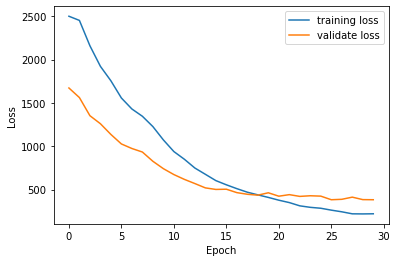

Test accuracy: 0.874826147426982 for alpha =0.01


In [19]:
copy_w = None
copy_b = None
loss_tol = 10
wait_iteration = 5
best_val_loss = 0
best_val_loss_idx = 0
tolerance = 30
# Train for 100 epochs with mini-batch size 1

cost_arr = [] 
val_loss_arr = []
M, N = X_train.shape

alpha=0.05


h2 = 3
h1 = 10
W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,10])]
b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[10,1])]
L = len(W)-1


max_iter = 100
for iter in range(1, max_iter+1):
    loss_this_iter = 0
    order = np.random.permutation(M)
    for i in range(0,M):
        
        # Grab the pattern order[i]
        
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]

        # Feed forward step
        
        a = [x_this]
        z = [[]]
        delta = [[]]
        dW = [[]]
        db = [[]]
        for l in range(1,L+1):
            z.append(W[l].T*a[l-1]+b[l])
            if (l == L):
                a.append(softmax_act(z[l]))
            else:
                a.append(sigmoid_act(z[l]))
            # Just to give arrays the right shape for the backprop step
            delta.append([]); dW.append([]); db.append([])
            
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
            
        # Backprop step. Note that derivative of multinomial cross entropy
        # loss is the same as that of binary cross entropy loss. See
        # https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba
        # for a nice derivation.

        delta[L] = a[L] - np.matrix(y_this).T
        for l in range(L,0,-1):
            db[l] = delta[l].copy()
            dW[l] = a[l-1] * delta[l].T
            if l > 1:
                delta[l-1] = np.multiply(sigmoid_actder(z[l-1]), W[l] *
                             delta[l])
                
        # Check delta calculation
        
        if False:
            print('Target: %f' % y_this)
            print('y_hat: %f' % a[L][0,0])
            print(db)
            y_pred = ff(x_this,W,b)
            diff = 1e-3
            W[1][10,0] = W[1][10,0] + diff
            y_pred_db = ff(x_this,W,b)
            L1 = loss(y_this,y_pred)
            L2 = loss(y_this,y_pred_db)
            db_finite_difference = (L2-L1)/diff
            print('Original out %f, perturbed out %f' %
                 (y_pred[0,0], y_pred_db[0,0]))
            print('Theoretical dW %f, calculated db %f' %
                  (dW[1][10,0], db_finite_difference[0,0]))
        
        for l in range(1,L+1):            
            W[l] = W[l] - alpha * dW[l]
            b[l] = b[l] - alpha * db[l]
            
    val_loss = 0
    for i in range(X_test.shape[0]):
        y_val = ff(X_test[i, :].T, W, b)
        y_val = np.array(y_val).flatten()
        val_loss += loss(y_test[i, :], y_val)
        
    if iter% 10 ==0:
        print('epoch %d train loss %f validate loss %f' % (iter, loss_this_iter, val_loss))

    if val_loss < best_val_loss or best_val_loss == 0 :
        copy_w, copy_b = copy.deepcopy(W), copy.deepcopy(b)
        best_val_loss = val_loss
        best_val_loss_idx = iter-1

    if iter>= tolerance + 1:
        if iter % wait_iteration == 0:
            alpha *= 0.5
        if val_loss > best_val_loss:
            W, b = copy_w, copy_b
            print(f'stop training at iter: {iter}')
            print(f' using best validation loss from epoch: { best_val_loss}')
            print(f'train loss : {cost_arr[best_val_loss_idx]} validate loss : {best_val_loss}')
            break
    
    cost_arr.append(loss_this_iter[0,0])
    val_loss_arr.append(val_loss)
    #     print('Epoch %d train loss %f' % (iter, loss_this_iter))
xd = np.arange(len(cost_arr))
plt.plot(xd, cost_arr, label='training loss')
plt.plot(xd, val_loss_arr, label='validate loss')
# plt.plot(np.arange(1,max_iter+1,1), cost_arr)
# plt.plot(np.arange(1, max_iter+1,1), cost_arr, c='b')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Get test set accuracy

def predict_y(W, b, X):
    M = X.shape[0]
    y_pred = np.zeros(M)
    for i in range(X.shape[0]):
        y_pred[i] = np.argmax(ff(X[i,:].T, W, b))
    return y_pred

y_test_predicted = predict_y(W, b, X_test)
y_correct = y_test_predicted == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: {} for alpha =0.01'.format(test_accuracy))

### model3: 3 layers with 10,5, 3 nodes, and learning rate of 0.01, with 100 epochs

epoch 10 train loss 2494.290575 validate loss 1665.496180
epoch 20 train loss 1685.818790 validate loss 1162.019261
epoch 30 train loss 1002.056155 validate loss 807.140707
epoch 40 train loss 700.360106 validate loss 614.585495
epoch 50 train loss 630.175042 validate loss 579.943212
epoch 60 train loss 612.228828 validate loss 568.653182
epoch 70 train loss 607.476188 validate loss 566.221435
epoch 80 train loss 606.262920 validate loss 565.557235
epoch 90 train loss 605.958864 validate loss 565.389249
epoch 100 train loss 605.882582 validate loss 565.347307


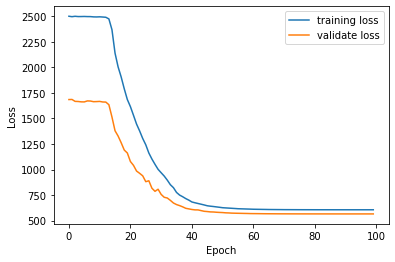

Test accuracy: 0.7579972183588317 for alpha =0.01


In [20]:
copy_w = None
copy_b = None
loss_tol = 10
wait_iteration = 5
best_val_loss = 0
best_val_loss_idx = 0
tolerance = 30
# Train for 100 epochs with mini-batch size 1

cost_arr = [] 
val_loss_arr = []
M, N = X_train.shape

alpha=0.05

h3 = 3
h2 = 10
h1 = 20
W = [[], np.random.normal(0,0.1,[N,h1]),
         np.random.normal(0,0.1,[h1,h2]),
         np.random.normal(0,0.1,[h2,h3]),
         np.random.normal(0,0.1,[h3,10])]
b = [[], np.random.normal(0,0.1,[h1,1]),
         np.random.normal(0,0.1,[h2,1]),
         np.random.normal(0,0.1,[h3,1]),
         np.random.normal(0,0.1,[10,1])]
L = len(W)-1


max_iter = 100
for iter in range(1, max_iter+1):
    loss_this_iter = 0
    order = np.random.permutation(M)
    for i in range(0,M):
        
        # Grab the pattern order[i]
        
        x_this = X_train[order[i],:].T
        y_this = y_train[order[i],:]

        # Feed forward step
        
        a = [x_this]
        z = [[]]
        delta = [[]]
        dW = [[]]
        db = [[]]
        for l in range(1,L+1):
            z.append(W[l].T*a[l-1]+b[l])
            if (l == L):
                a.append(softmax_act(z[l]))
            else:
                a.append(sigmoid_act(z[l]))
            # Just to give arrays the right shape for the backprop step
            delta.append([]); dW.append([]); db.append([])
            
        loss_this_pattern = loss(y_this, a[L])
        loss_this_iter = loss_this_iter + loss_this_pattern
            
        # Backprop step. Note that derivative of multinomial cross entropy
        # loss is the same as that of binary cross entropy loss. See
        # https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba
        # for a nice derivation.

        delta[L] = a[L] - np.matrix(y_this).T
        for l in range(L,0,-1):
            db[l] = delta[l].copy()
            dW[l] = a[l-1] * delta[l].T
            if l > 1:
                delta[l-1] = np.multiply(sigmoid_actder(z[l-1]), W[l] *
                             delta[l])
                
        # Check delta calculation
        
        if False:
            print('Target: %f' % y_this)
            print('y_hat: %f' % a[L][0,0])
            print(db)
            y_pred = ff(x_this,W,b)
            diff = 1e-3
            W[1][10,0] = W[1][10,0] + diff
            y_pred_db = ff(x_this,W,b)
            L1 = loss(y_this,y_pred)
            L2 = loss(y_this,y_pred_db)
            db_finite_difference = (L2-L1)/diff
            print('Original out %f, perturbed out %f' %
                 (y_pred[0,0], y_pred_db[0,0]))
            print('Theoretical dW %f, calculated db %f' %
                  (dW[1][10,0], db_finite_difference[0,0]))
        
        for l in range(1,L+1):            
            W[l] = W[l] - alpha * dW[l]
            b[l] = b[l] - alpha * db[l]
            
    val_loss = 0
    for i in range(X_test.shape[0]):
        y_val = ff(X_test[i, :].T, W, b)
        y_val = np.array(y_val).flatten()
        val_loss += loss(y_test[i, :], y_val)
        
    if iter% 10 ==0:
        print('epoch %d train loss %f validate loss %f' % (iter, loss_this_iter, val_loss))

    if val_loss < best_val_loss or best_val_loss == 0 :
        copy_w, copy_b = copy.deepcopy(W), copy.deepcopy(b)
        best_val_loss = val_loss
        best_val_loss_idx = iter-1

    if iter>= tolerance + 1:
        if iter % wait_iteration == 0:
            alpha *= 0.5
        if val_loss > best_val_loss:
            W, b = copy_w, copy_b
            print(f'stop training at iter: {iter}')
            print(f' using best validation loss from epoch: { best_val_loss}')
            print(f'train loss : {cost_arr[best_val_loss_idx]} validate loss : {best_val_loss}')
            break
    
    cost_arr.append(loss_this_iter[0,0])
    val_loss_arr.append(val_loss)
    #     print('Epoch %d train loss %f' % (iter, loss_this_iter))
xd = np.arange(len(cost_arr))
plt.plot(xd, cost_arr, label='training loss')
plt.plot(xd, val_loss_arr, label='validate loss')
# plt.plot(np.arange(1,max_iter+1,1), cost_arr)
# plt.plot(np.arange(1, max_iter+1,1), cost_arr, c='b')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Get test set accuracy

def predict_y(W, b, X):
    M = X.shape[0]
    y_pred = np.zeros(M)
    for i in range(X.shape[0]):
        y_pred[i] = np.argmax(ff(X[i,:].T, W, b))
    return y_pred

y_test_predicted = predict_y(W, b, X_test)
y_correct = y_test_predicted == y_test_indices
test_accuracy = np.sum(y_correct) / len(y_correct)

print('Test accuracy: {} for alpha =0.01'.format(test_accuracy))

1st MODEL: 2 layers with 6,5 hidden nodes, and learning rate of 0.01, with 100 epochs
Observaiton
- training and validate loss declines sharply within the first 40 epochs before starting to plateau until the 100th epoch
- the optimal validate loss is at 702, with accuracy rate of ~67%

2nd MODEL: 2 layers with 10,3 hidden nodes, and learning rate of 0.05, with 100 epoch
- training and validate loss declines sharply and continuously, and have an early stop at the 30th epoch
- the validation loss starts to rebount and exceed the training loss at around 20th epoch, notifying the potential overfitting model
- the optimal validate loss is at 271, with accuracy rate of ~91%


3rd MODEL: 3 layers with 10,5, 3 hidden nodes, and learning rate of 0.01, with 100 epochs
- training and validate loss appears to remain constant on the first 15 epochs before dropping without smoothness 
- the optimal validate loss is at 679, with accuracy rate of ~60%


### SUMMARY

from the 3 models above, the second model with higher number of nodes in each layer and higher learning rate yields the better accuracy within fewer epochs

---

## PyTorch tutorial

Is there an easier way to build this type of model? One way is to learn a framework such as TensorFlow or PyTorch. Both of these frameworks have their
pros and cons, but PyTorch is probably the most productive neural network framework for research purposes. We'll use it here.

The material for this tutorial is from
[Anand Saha's PyTorch tutorial](https://github.com/anandsaha/deep.learning.with.pytorch).

### Tensors and Tensor operations

Let's get some hands on experience with tensor creation and operations.
The torch package contains the necessary data structures to create multidimensional tensors.
It also defines the mathematical operations that can be performed on these.

In [21]:
import torch

print('Torch version:', torch.__version__)
print('Torch+CUDA working:', torch.cuda.is_available())

Torch version: 1.4.0
Torch+CUDA working: True


#### Tensor creation

Let's create a (2$\times$3) (two-dimensional) tensor.

Note that a) you get back a FloatTensor, and  b) the values are uninitialized.

In [22]:
t = torch.Tensor(2, 3)
print(t)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


The above call was equivalent to

In [23]:
t = torch.FloatTensor(2, 3)
print(t)

tensor([[-3.4176e+31,  3.0735e-41, -3.4180e+31],
        [ 3.0735e-41,  1.4013e-45,  0.0000e+00]])


We can access an element, get an element's type, and get the shape of the tensor:

In [24]:
print('Elmement 0,0 of t:', t[0,0])
print('Type of element 0,0 of t:', type(t[0,0]))
print('Size of t:', t.size())
print('Number of dimensions in t:', t.dim())
print('A tensor\'s length is the number of dimensions it has?', len(t.size()) == t.dim())

Elmement 0,0 of t: tensor(-3.4176e+31)
Type of element 0,0 of t: <class 'torch.Tensor'>
Size of t: torch.Size([2, 3])
Number of dimensions in t: 2
A tensor's length is the number of dimensions it has? True


Let's set some of the elements of the the tensor to various values:

In [25]:
t[0][0] = 1
t[0][1] = 2
t[0][2] = 3
t[1][0] = 4
t[1][1] = 5
t[1][2] = 6
print(t)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


A `FloatTensor` can be cast to an `IntTensor`:

In [26]:
t = torch.FloatTensor([1.1, 2.2])
print('Float tensor:', t)
print('Int tensor:', t.type(torch.IntTensor))

Float tensor: tensor([1.1000, 2.2000])
Int tensor: tensor([1, 2], dtype=torch.int32)


Let's explore some other ways of creating a tensor.

In [28]:
# From another Tensor

t2 = torch.Tensor(t)
print('From a tensor:', t2)

# From a Python list

t3 = torch.IntTensor([[1, 2], [3, 4]])
print('From a Python list:', t3)

# From a NumPy array

import numpy as np
a = np.array([55, 66])
t4 = torch.Tensor(a)
print('From a NumPy array:', t4)

# A tensor with all zeros

t5 = torch.zeros(2, 3)
print('A tensor with all zeros:', t5)

# Create a tensor with all ones

t6 = torch.ones(2, 3)
print('A tensor with all ones:', t6)

# Create a tensor with all ones with dimensions 
# of another tensor

t7 = torch.ones_like(t4)
print('Another tensor of ones, with shape like another:', t7)

From a tensor: tensor([1.1000, 2.2000])
From a Python list: tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
From a NumPy array: tensor([55., 66.])
A tensor with all zeros: tensor([[0., 0., 0.],
        [0., 0., 0.]])
A tensor with all ones: tensor([[1., 1., 1.],
        [1., 1., 1.]])
Another tensor of ones, with shape like another: tensor([1., 1.])


#### Tensor operations

Let's experiment with operations on tensors. We can add tensors of the same shape:

In [29]:
t1 = torch.ones(2, 2)
t2 = torch.ones(2, 2)
t = t1 + t2
print(t)

tensor([[2., 2.],
        [2., 2.]])


Here are some examples of in-place and out-of-place operations.

In [30]:
t1.add(t2)

tensor([[2., 2.],
        [2., 2.]])

In [31]:
print(t1)

tensor([[1., 1.],
        [1., 1.]])


In [32]:
t1.add_(t2)

tensor([[2., 2.],
        [2., 2.]])

In [33]:
print(t1)

tensor([[2., 2.],
        [2., 2.]])


Many operations are implemented as both instance methods and as library/package functions:

In [34]:
t1.cos()

tensor([[-0.4161, -0.4161],
        [-0.4161, -0.4161]])

In [35]:
torch.cos(t1)

tensor([[-0.4161, -0.4161],
        [-0.4161, -0.4161]])

A few more operations

In [36]:
# Create a one-dimensional tensor of steps equally 
# spaced points between start and end

torch.linspace(3, 10, steps=5)

tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])

In [37]:
# Create a 1-D Tensor with values from [start, end)

torch.arange(0, 5)

tensor([0, 1, 2, 3, 4])

In [38]:
# Create a (2x3) Tensor with random values sampled 
# from uniform distrubution on the interval [0,1)

torch.rand((2,3))

tensor([[0.2425, 0.0877, 0.9210],
        [0.1391, 0.6441, 0.7067]])

In [39]:
# Create a (2x3) Tensor with random values sampled 
# from normal distrubution with 0 mean and variance 1

torch.randn((2,3))

tensor([[-0.4075, -0.5597, -0.2798],
        [ 0.6052,  0.0534,  1.1268]])

In [40]:
# Do a matrix multiply

a = torch.rand((2, 3))
b = torch.rand((3, 2))

torch.mm(a, b)

tensor([[1.0117, 0.3402],
        [0.5722, 0.1911]])

In [41]:
a @  b

tensor([[1.0117, 0.3402],
        [0.5722, 0.1911]])

#### Variables

Next, let's understand variables in PyTorch and the operations we can perform on them.

In [42]:
import torch
from torch.autograd import Variable

Let's create a small computation graph

In [43]:
x = Variable(torch.FloatTensor([11.2]), requires_grad=True)
y = 2 * x

In [44]:
print(x)
print(y)

tensor([11.2000], requires_grad=True)
tensor([22.4000], grad_fn=<MulBackward0>)


In [45]:
print(x.data)
print(y.data)

tensor([11.2000])
tensor([22.4000])


In [46]:
print(x.grad_fn)
print(y.grad_fn)

None


In [47]:
y.backward() # Calculates the gradients

In [48]:
print(x.grad)
print(y.grad)

tensor([2.])
None


### Working with PyTorch and NumPy

In [49]:
import torch
import numpy as np

Convert a NumPy array to Tensor

In [50]:
n = np.array([2, 3])
t = torch.from_numpy(n)
print(n)
print(t)

[2 3]
tensor([2, 3])


Change a Tensor value, and see the change in 
corresponding NumPy array

In [51]:
n[0] = 100
print(t)

tensor([100,   3])


Convert a Tensor to NumPy array

In [52]:
t = torch.FloatTensor([5, 6])
n = t.numpy()
print(t)
print(n)

tensor([5., 6.])
[5. 6.]


Change a Tensor value, and see the change in corresponding NumPy array

In [53]:
t[0] = 100
print(n)

[100.   6.]


### Tensors on GPU

Check if your machine has GPU support

In [54]:
if torch.cuda.is_available():
    print("GPU Supported")
else:
    print("GPU Not Supported")

GPU Supported


Check the number of GPUs attached to this machine

In [55]:
torch.cuda.device_count()

4

Get device name

In [56]:
torch.cuda.get_device_name(0)

'GeForce RTX 2080 Ti'

Moving a Tensor to GPU

In [57]:
t = torch.FloatTensor([2, 3])

In [58]:
print(t)

tensor([2., 3.])


In [59]:
t = t.cuda(0)

Creating a Tensor on GPU, directly

In [60]:
t = torch.cuda.FloatTensor([2, 3])
print(t)

tensor([2., 3.], device='cuda:0')


Bring it back to CPU

In [61]:
t = t.cpu()
print(t)

tensor([2., 3.])


Use device context

In [62]:
with torch.cuda.device(0):
    t = torch.cuda.FloatTensor([2, 3])
    print(t)

tensor([2., 3.], device='cuda:0')



## MNIST digit recognition using PyTorch

This part of the lab was
taken from the [Kaggle tutorial on MNIST with PyTorch]('https://www.kaggle.com/justuser/mnist-with-pytorch-fully-connected-network).

We will use a fully connected neural network and a batch learning algorithm and explain each
step along the way.

We need NumPy, PyTorch, some of PyTorch's modules, MatPlotLib, Seaborn for visualization, and pandas for
data import and transformations.

In [63]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Now we can import and transform the data. I decided to split it into input and labels right away at this step:

In [64]:
print("Reading the data...")
data = pd.read_csv('train_mnist.csv', sep=",")
test_data = pd.read_csv('test_mnist.csv', sep=",")

print("Reshaping the data...")
dataFinal = data.drop('label', axis=1)
labels = data['label']


dataNp = dataFinal.to_numpy()
labelsNp = labels.to_numpy()
test_dataNp = test_data.to_numpy()

print("Data is ready")

Reading the data...
Reshaping the data...
Data is ready


Now that data is ready, we can take a look at what we're dealing with. I will be using heatmaps from seaborn, which is an excellent tool for matrix visualization. But first, since the images in the MNIST dataset are represented as a long 1d arrays of pixels, we will need to reshape it into 2d array. That's where .reshape() from numpy comes in handy. The pictures are 28 x 28 pixels, so these will be the parameters.

Let's select a couple random samples and visualize them. I will also print their labels, so we can compare images with their actual value:

In [65]:
28 *28

784

In [66]:
dataNp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

8  /  9
8  /  4
9  /  1


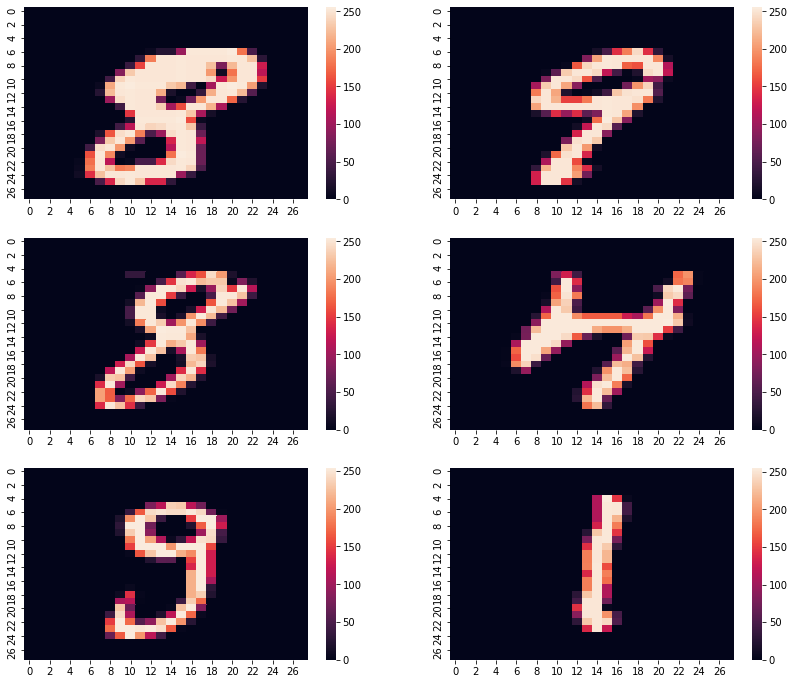

In [67]:
plt.figure(figsize=(14, 12))

pixels = dataNp[10].reshape(28, 28)
plt.subplot(321)
sns.heatmap(data=pixels)

pixels = dataNp[11].reshape(28, 28)
plt.subplot(322)
sns.heatmap(data=pixels)

pixels = dataNp[20].reshape(28, 28)
plt.subplot(323)
sns.heatmap(data=pixels)

pixels = dataNp[32].reshape(28, 28)
plt.subplot(324)
sns.heatmap(data=pixels)

pixels = dataNp[40].reshape(28, 28)
plt.subplot(325)
sns.heatmap(data=pixels)

pixels = dataNp[52].reshape(28, 28)
plt.subplot(326)
sns.heatmap(data=pixels)

print(labels[10], " / ", labels[11])
print(labels[20], " / ", labels[32])
print(labels[40], " / ", labels[52])

Since PyTorch uses tensors, we need to transform the input images
into tensors. The good news, as we saw earlier, is that PyTorch makes it very easy to move data from
NumPy arrays or regular Python lists to tensors. Here's how to do it for our data:

In [68]:
torch.FloatTensor(dataNp) == torch.FloatTensor(dataNp.tolist())

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [69]:
x = torch.FloatTensor(dataNp.tolist())
y = torch.LongTensor(labelsNp.tolist())

Before we start writing the actual network, we need to determine what will be the hyperparameters. Those will not be adjusted during training, so we need to be careful how we set them up. 

Here's what we will specify:
* **input_size** - size of the input layer, it is always fixed (784 pixels)
* **output_size** - size of the output layer, also fixed size (10 for every possible digit)
* **hidden_size** - size of the hidden layer, this parameter determines structure of the network. 200 worked for me, but it is worth to play with this parameter to see what works for you
* **epochs** - how many times will the network go through the entire dataset during training. 
* **learning_rate** - determines how fast will the network learn. You should be very careful about this parameter, because if it is too high, the network won't learn at all, if it is too low, the net will learn too long. I's always about balance. Usualy 10^-3 - 10^-5 works just fine.
* **batch_size** - size of mini batches during training

In [70]:
# hyperparameters
input_size = 784
output_size = 10
hidden_size = 200

epochs = 20
batch_size = 50
learning_rate = 0.00005

Now we can finally write a Python class for the actual network.
Our `Network` class will be a subclass of PyTorch's neural network
`Module` class.

When writing a PyTorch neural network class, a few things must always be there:
* `__init__(self)`: initializes the the new `Network` instance. Here we set up instance fields
  representing the parameters of the network as well as any other needed initialization.
* `forward(self, x)`: defines how an input is propagated forward through the various layers
  and transformations in the network. The forward function normally makes use of the instance
  fields set up in the initialization stage.

In the initialization, first of all, we need to initialize the superclass's fields then
create needed layers with parameters. You can experiment with this (put more layers or change hidden layer size, etc.), but the give structure will work fine.

In forward propagation, we simply reassign the value of `x` as it flows through the layers
and return the softmax of the last linear layer's values at the end.

In [71]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l3(x)
        return F.log_softmax(x)

After we've defined the network, we can initialize it. 
Also, if we "print" the instance of the net, we can see the structure of it in a neat format:

In [72]:
net = Network()
print(net)

Network(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (relu): ReLU()
  (l3): Linear(in_features=200, out_features=10, bias=True)
)


In [73]:
list(net.parameters())[0].shape

torch.Size([200, 784])

Now it's time to set up the [optimizer](http://pytorch.org/docs/master/optim.html) and a loss function. 

*There are quite a lot of things happening behind these two lines of code, so if you don't know what is going on here, don't worry too much for now, it will get clearer eventualy.* 

Optimizer is what  updates the parameters of the network. We'll use the most basic method, stochastic gradient descent with momentum. Also, the optimizer takes the network parameters as an argument, but it's not a big deal since we can get those with a `parameters()` method call on the network instance.

As is standard for a multinomial output distribution, we use [cross entropy loss](https://en.wikipedia.org/wiki/Cross_entropy).

In [74]:
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

Now that everything is ready, our network can start learning. I will separate data into minibatches and feed it to the network. It has many advantages over single batch learning, but that is a different story. 

Also, I will use loss_log list to keep track of the loss function during the training process. 

### hyperparameters

input_size = 784

output_size = 10

hidden_size = 200

epochs = 20

batch_size = 50

learning_rate = 0.00005

In [75]:
loss_log = []

for e in range(epochs):
    for i in range(0, x.shape[0], batch_size): #this manual method is used instead of DataLoader performed in CP class
        x_mini = x[i:i + batch_size] 
        y_mini = y[i:i + batch_size] 
        
        x_var = Variable(x_mini)
        y_var = Variable(y_mini)
        
        optimizer.zero_grad()
        net_out = net(x_var)
        
        loss = loss_func(net_out, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            loss_log.append(loss.item())
        
    print('Epoch: {} - Loss: {:.6f}'.format(e, loss.item()))

Epoch: 0 - Loss: 0.119809
Epoch: 1 - Loss: 0.052439
Epoch: 2 - Loss: 0.027776
Epoch: 3 - Loss: 0.020698
Epoch: 4 - Loss: 0.013601
Epoch: 5 - Loss: 0.010298
Epoch: 6 - Loss: 0.008679
Epoch: 7 - Loss: 0.007309
Epoch: 8 - Loss: 0.006190
Epoch: 9 - Loss: 0.006534
Epoch: 10 - Loss: 0.005848
Epoch: 11 - Loss: 0.005451
Epoch: 12 - Loss: 0.005375
Epoch: 13 - Loss: 0.004436
Epoch: 14 - Loss: 0.004348
Epoch: 15 - Loss: 0.003763
Epoch: 16 - Loss: 0.003371
Epoch: 17 - Loss: 0.002978
Epoch: 18 - Loss: 0.002629
Epoch: 19 - Loss: 0.002264


In [76]:
torch.FloatTensor([3])

tensor([3.])

In [77]:
#Use Wrapper Variable so that we can specify the requires_grad parameter
Variable(torch.FloatTensor([3]) , requires_grad = True) 

tensor([3.], requires_grad=True)

In [78]:
torch.tensor(torch.FloatTensor([3]), requires_grad = True )

tensor([3.], requires_grad=True)

So, let's go line by line and see what is happening here:

This is the main loop that goes through all the epochs of training. An epoch is one full training on the full dataset.

    for e in range(epochs):
This is the inner loop that simply goes through the dataset batch by batch:

    for i in range(0, x.shape[0], batch_size):
Here is where we get the batches out of our data and simply assign them to variables for further work:

    x_mini = x[i:i + batch_size] 
    y_mini = y[i:i + batch_size] 
   These two lines are quite *important*. Remember I told you about tensors and how PyTorch stores data in them? That's not the end of story. Actually, to allow the network to work with data, we need a wrapper for those tensors called Variable. It has some additional properties, like allowing automatic gradient computation when backpropagating. It is required for the proper work of PyTorch, so we will add them here and supply tensors as parameters:
   
    x_var = Variable(x_mini)
    y_var = Variable(y_mini)
This line just resets the gradient of the optimizer:
    
    optimizer.zero_grad()
Remember the *forward(self, x)* function that we previously defined? The next line is basically calling this function and does the forward propagation:

    net_out = net(x_var)
This line computes the loss function based on predictions of the net and the correct answers:

    loss = loss_func(net_out, y_var)
Here we compute the gradient based on the loss that we've got. It will be used to adjust parameters of the network.

    loss.backward()
And here is where we finally update our network with new adjusted parameters:

    optimizer.step()
The rest is just logging, which might be helpful to observe how well the network is performing.

After the network is done with training, we can take a look at the loss function, and how it behaved during training:

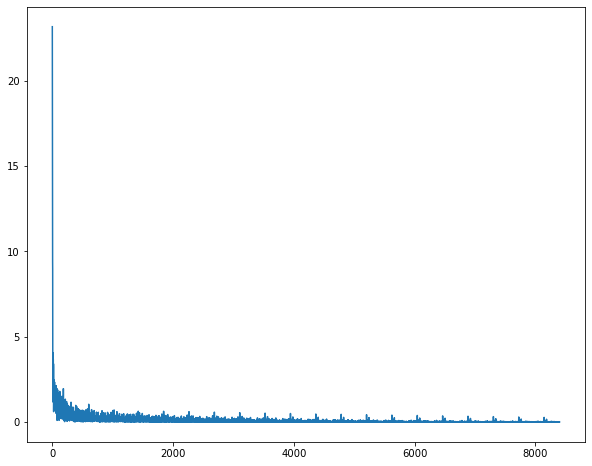

In [79]:
plt.figure(figsize=(10,8))
plt.plot(loss_log)

At this point, the network should be trained, and we can make a prediction using the test dataset. All we need to do is wrap the data into the Variable and feed it to the trained net, so nothing new here.

In [80]:
test = torch.FloatTensor(test_dataNp.tolist())
# test_var = Variable(test)

net_out = net(test)

print(torch.max(net_out.data, 1)[1].numpy())

[2 0 9 ... 3 9 2]


Now we have out predictions that are ready to be submitted. Before that, we can take a look at predictions and compare them to the actual pictures of digits, just like at the start with training data:

Prediction: 0 / 5
Prediction: 9 / 7
Prediction: 0 / 8


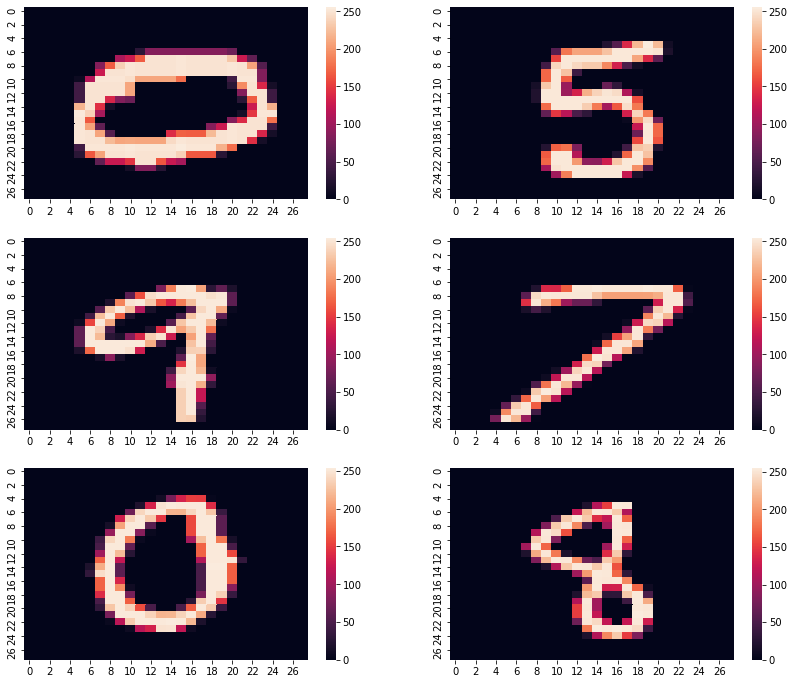

In [81]:
plt.figure(figsize=(14, 12))

pixels = test_dataNp[1].reshape(28, 28)
plt.subplot(321)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[1].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[10].reshape(28, 28)
plt.subplot(322)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[10].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[20].reshape(28, 28)
plt.subplot(323)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[20].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[30].reshape(28, 28)
plt.subplot(324)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[30].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[100].reshape(28, 28)
plt.subplot(325)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[100].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)

pixels = test_dataNp[2000].reshape(28, 28)
plt.subplot(326)
sns.heatmap(data=pixels)
test_sample = torch.FloatTensor(test_dataNp[1].tolist())
test_var_sample = Variable(test_sample)
net_out_sample = net(test_var_sample)


print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[1], torch.max(net_out.data, 1)[1].numpy()[10]))
print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[20], torch.max(net_out.data, 1)[1].numpy()[30]))
print("Prediction: {} / {}".format(torch.max(net_out.data, 1)[1].numpy()[100], torch.max(net_out.data, 1)[1].numpy()[2000]))

In [82]:
output = (torch.max(net_out.data, 1)[1]).numpy()
#np.savetxt("out.csv", np.dstack((np.arange(1, output.size+1),output))[0],"%d,%d",header="ImageId,Label")

In [83]:
output

array([2, 0, 9, ..., 3, 9, 2])

And that is about it, we've made a simple neural network using PyTorch that can recognize handwritten digits. Not so bad!

When I was writing this notebook, this model scorred 96.6%, which is not perfect by any means, but it's not that bad either. 

I hope this was useful for some of you. If you are totally new to deep learning, I suggest you learn how the neural networks actually work from the inside, especially the backpropagation algorithm.

These videos explain [neural nets](https://www.youtube.com/watch?v=aircAruvnKk&t=708s) and [backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U) quite well.

Also I suggest you to take a look at this [online book](http://neuralnetworksanddeeplearning.com/chap1.html) (it's absolutely free, btw), where neural networks are explained in great detail, and it even has an implementation of the MNIST problem from scratch, using only numpy.

If you have any feedback, feel free to leave comments down below, and good luck with your deep learning adventures :)

## Take-home exercise (50 points)

Make sure you can run the PyTorch examples of MNIST classification, then apply the PyTorch example to another
classification problem you've worked with this semester, the breast cancer dataset. Get familiar with
working with models in PyTorch, get the best result you can on the breast cancer dataset, then 
report your experiments and results in your brief lab report.

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("breast_cancer.csv")
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [85]:
X = data.drop(columns=['id','Unnamed: 32','diagnosis'])
y = data['diagnosis']
y, unique_y = pd.factorize(y)
X_columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train)
y_test_tensor = torch.FloatTensor(y_test)

In [86]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = torch.sigmoid(out)
        return out

In [87]:
m,n = X_train.shape

Epoch: 5 - Loss: 0.332216
Epoch: 10 - Loss: 0.106374
Epoch: 15 - Loss: 0.048534
Epoch: 20 - Loss: 0.031468
Epoch: 25 - Loss: 0.023995
Epoch: 30 - Loss: 0.019681
Epoch: 35 - Loss: 0.016988
Epoch: 40 - Loss: 0.014993
Epoch: 45 - Loss: 0.013400
Epoch: 50 - Loss: 0.012321
Epoch: 55 - Loss: 0.011485
Epoch: 60 - Loss: 0.010881
Epoch: 65 - Loss: 0.010437
Epoch: 70 - Loss: 0.010033
Epoch: 75 - Loss: 0.009720
Epoch: 80 - Loss: 0.009449
Epoch: 85 - Loss: 0.009220
Epoch: 90 - Loss: 0.009028
Epoch: 95 - Loss: 0.008860
Epoch: 100 - Loss: 0.008717
Accuracy rate on train set: 0.989010989010989
Accuracy rate on test set: 0.9824561403508771


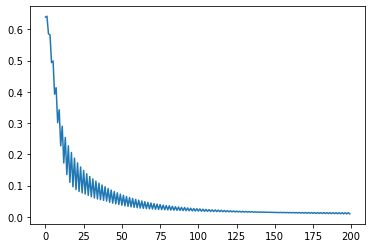

In [88]:
## HYPERPARAMETER
input_size = X_train.shape[1]
output_size = 1
hidden1_size = 5
epochs = 100
batch_size = 30
learning_rate = 0.005



class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = torch.sigmoid(out)
        return out
    
    
model1 = Network()
criterion = nn.BCELoss()
optimizer = optim.SGD(model1.parameters(), lr=learning_rate, momentum=0.9)



loss_log = []

for e in range(epochs):
    for i in range(0, m, batch_size): 
        x_mini = X_train_tensor[i:i + batch_size] 
        y_mini = y_train_tensor[i:i + batch_size] 
        
        x_var = Variable(x_mini, requires_grad = True)
        y_var = Variable(y_mini).view(-1,1)
        

        
        optimizer.zero_grad()
        net_out = model1(x_var)
        
        
        loss = criterion(net_out, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            loss_log.append(loss.item())
            
    if (e+1) % 5 == 0:
        print('Epoch: {} - Loss: {:.6f}'.format(e+1, loss.item()))

with torch.no_grad():
    train_y_predicted = model1(X_train_tensor).round().flatten()
    train_accuracy = train_y_predicted.eq(y_train_tensor).sum().item() / y_train.shape[0]
    print(f"Accuracy rate on train set: {train_accuracy}")
        
        
        
with torch.no_grad():
    y_predicted = model1(X_test_tensor).round().flatten()
    accuracy = y_predicted.eq(y_test_tensor).sum().item() / y_test.shape[0]
    print(f"Accuracy rate on test set: {accuracy}")
    
plt.plot(loss_log)

Epoch: 5 - Loss: 0.008686
Epoch: 10 - Loss: 0.008657
Epoch: 15 - Loss: 0.008628
Epoch: 20 - Loss: 0.008600
Epoch: 25 - Loss: 0.008573
Epoch: 30 - Loss: 0.008547
Epoch: 35 - Loss: 0.008521
Epoch: 40 - Loss: 0.008495
Epoch: 45 - Loss: 0.008454
Epoch: 50 - Loss: 0.008384
Epoch: 55 - Loss: 0.008320
Epoch: 60 - Loss: 0.008256
Epoch: 65 - Loss: 0.008196
Epoch: 70 - Loss: 0.008131
Epoch: 75 - Loss: 0.008067
Epoch: 80 - Loss: 0.008005
Epoch: 85 - Loss: 0.007945
Epoch: 90 - Loss: 0.007887
Epoch: 95 - Loss: 0.007831
Epoch: 100 - Loss: 0.007769
Accuracy rate on train set: 0.989010989010989
Accuracy rate on test set: 0.9824561403508771


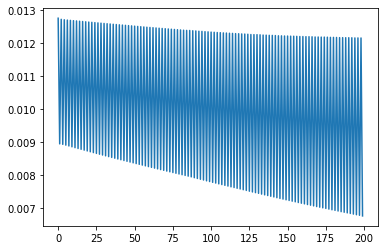

In [89]:
## HYPERPARAMETER
input_size = X_train.shape[1]
output_size = 1
hidden1_size = 50
epochs = 100
batch_size = 30
learning_rate = 0.001



class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = torch.sigmoid(out)
        return out
    
    
model2 = Network()
criterion = nn.BCELoss()
optimizer = optim.SGD(model1.parameters(), lr=learning_rate, momentum=0.9)



loss_log = []

for e in range(epochs):
    for i in range(0, m, batch_size): 
        x_mini = X_train_tensor[i:i + batch_size] 
        y_mini = y_train_tensor[i:i + batch_size] 
        
        x_var = Variable(x_mini, requires_grad = True)
        y_var = Variable(y_mini).view(-1,1)
        

        
        optimizer.zero_grad()
        net_out = model1(x_var)
        
        
        loss = criterion(net_out, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            loss_log.append(loss.item())
            
    if (e+1) % 5 == 0:
        print('Epoch: {} - Loss: {:.6f}'.format(e+1, loss.item()))
        

with torch.no_grad():
    train_y_predicted = model1(X_train_tensor).round().flatten()
    train_accuracy = train_y_predicted.eq(y_train_tensor).sum().item() / y_train.shape[0]
    print(f"Accuracy rate on train set: {train_accuracy}")
        
        
with torch.no_grad():
    y_predicted = model1(X_test_tensor).round().flatten()
    accuracy = y_predicted.eq(y_test_tensor).sum().item() / y_test.shape[0]
    print(f"Accuracy rate on test set: {accuracy}")
    
plt.plot(loss_log)

Epoch: 5 - Loss: 0.007547
Epoch: 10 - Loss: 0.007321
Epoch: 15 - Loss: 0.007084
Epoch: 20 - Loss: 0.006873
Epoch: 25 - Loss: 0.006685
Epoch: 30 - Loss: 0.006519
Epoch: 35 - Loss: 0.006372
Epoch: 40 - Loss: 0.006184
Epoch: 45 - Loss: 0.006018
Epoch: 50 - Loss: 0.005873
Epoch: 55 - Loss: 0.005743
Epoch: 60 - Loss: 0.005622
Epoch: 65 - Loss: 0.005508
Epoch: 70 - Loss: 0.005400
Epoch: 75 - Loss: 0.005300
Epoch: 80 - Loss: 0.005207
Epoch: 85 - Loss: 0.005117
Epoch: 90 - Loss: 0.005034
Epoch: 95 - Loss: 0.004954
Epoch: 100 - Loss: 0.004873
Accuracy rate on train set: 0.9912087912087912
Accuracy rate on test set: 0.9824561403508771


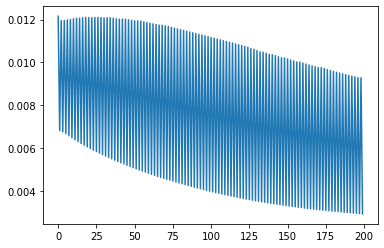

In [90]:
## HYPERPARAMETER
input_size = X_train.shape[1]
output_size = 1
hidden1_size = 25
hidden2_size = 10
epochs = 100
batch_size = 30
learning_rate = 0.005



class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        
        out = self.fc2(out)
        out = self.relu(out)
        
        out = self.fc3(out)
        out = torch.sigmoid(out)
        return out
    
    
model3 = Network()
criterion = nn.BCELoss()
optimizer = optim.SGD(model1.parameters(), lr=learning_rate, momentum=0.9)



loss_log = []

for e in range(epochs):
    for i in range(0, m, batch_size): 
        x_mini = X_train_tensor[i:i + batch_size] 
        y_mini = y_train_tensor[i:i + batch_size] 
        
        x_var = Variable(x_mini, requires_grad = True)
        y_var = Variable(y_mini).view(-1,1)
        

        
        optimizer.zero_grad()
        net_out = model1(x_var)
        
        
        loss = criterion(net_out, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            loss_log.append(loss.item())
            
    if (e+1) % 5 == 0:
        print('Epoch: {} - Loss: {:.6f}'.format(e+1, loss.item()))
        
with torch.no_grad():
    train_y_predicted = model1(X_train_tensor).round().flatten()
    train_accuracy = train_y_predicted.eq(y_train_tensor).sum().item() / y_train.shape[0]
    print(f"Accuracy rate on train set: {train_accuracy}")
        
        
with torch.no_grad():
    y_predicted = model1(X_test_tensor).round().flatten()
    accuracy = y_predicted.eq(y_test_tensor).sum().item() / y_test.shape[0]
    print(f"Accuracy rate on test set: {accuracy}")
    
plt.plot(loss_log)

## Compare with LogisticRegression using Sklean

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [92]:
logmodel = LogisticRegression(fit_intercept= True)
logmodel.fit(X_train, y_train)

LogisticRegression()

In [93]:
yhat_train = logmodel.predict(X_train)
print(classification_report(y_true = y_train, y_pred =yhat_train))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       169
           1       0.99      0.99      0.99       286

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



In [94]:
yhat_test = logmodel.predict(X_test)
print(classification_report(y_true = y_test, y_pred =yhat_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



---
## Lab Report Summary
for the breast cancer binary classification with deep learning, I have created 3 models with different hyperparameters as follows:
- 1stmodel: 1 hidden layer with 5 hidden nodees, 100 epochs and learning rate of 0.005
- 2ndmodel: 1 hidden layer with 50 hidden nodees, 100 epochs and learning rate of 0.001
- 3rdmodel: 2 hidden layer with 25 , 10 hidden nodees, 100 epochs and learning rate of 0.005

All the models above can perform almost perfect as their accuracy score for both training and test data is as high as 98~99%
But in terms of efficiency, the first model is the best one as it has less complexity but still performs really well